In [1]:
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
from copy import deepcopy
import pandas as pd
import numpy as np
from more_itertools import flatten

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import community
import networkx as nx

In [5]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
alliance_net_df = pd.read_pickle('pickle/alliance_net_df.pkl')
mid_net_df = pd.read_pickle('pickle/mid_net_df.pkl')
trade_net_df = pd.read_pickle('pickle/trade_net_df.pkl')
gov_df = pd.read_pickle('pickle/gov_df.pkl')

In [7]:
aggregations = {
    'year': 'count'
    }

country_loc_df = gov_df.groupby(['c_code_1', 'un_region', 'un_continent']).agg(aggregations).reset_index()
country_loc_df.rename({'year': 'num_years'}, axis = 1, inplace = True)

In [8]:
country_loc_df.loc[197, 'c_code_1'] = 817
country_loc_df.loc[197, 'un_region'] = 'South-Eastern Asia'
country_loc_df.loc[197, 'un_continent'] = 'Asia'
country_loc_df.loc[197, 'num_years'] = 0
country_loc_df.loc[198, 'c_code_1'] = 347
country_loc_df.loc[198, 'un_region'] = 'Southern Europe'
country_loc_df.loc[198, 'un_continent'] = 'Europe'
country_loc_df.loc[198, 'num_years'] = 0
country_loc_df.loc[199, 'c_code_1'] = 511
country_loc_df.loc[199, 'un_region'] = 'Eastern Africa'
country_loc_df.loc[199, 'un_continent'] = 'Africa'
country_loc_df.loc[199, 'num_years'] = 0
country_loc_df.loc[200, 'c_code_1'] = 221
country_loc_df.loc[200, 'un_region'] = 'Western Europe'
country_loc_df.loc[200, 'un_continent'] = 'Europe'
country_loc_df.loc[200, 'num_years'] = 0

In [9]:
trade_net_df = deepcopy(pd.merge(country_loc_df, trade_net_df, how = 'inner', on = ['c_code_1']))
trade_net_df.rename({'un_region': 'un_region_1', 'un_continent': 'un_continent_1'}, axis = 1, inplace = True)
trade_net_df.drop(['num_years'], axis = 1, inplace = True)

In [10]:
country_loc_df.rename({'c_code_1': 'c_code_2'}, axis = 1, inplace = True)
trade_net_df = deepcopy(pd.merge(country_loc_df, trade_net_df, how = 'inner', on = ['c_code_2']))
trade_net_df.rename({'un_region': 'un_region_2', 'un_continent': 'un_continent_2'}, axis = 1, inplace = True)
trade_net_df.drop(['num_years'], axis = 1, inplace = True)

In [11]:
print(len(trade_net_df[trade_net_df['money_flow_1'] <= 0]))
print(len(trade_net_df[trade_net_df['money_flow_2'] <= 0]))

0
0


In [12]:
trade_net_df.head()

,c_code_2,un_region_2,un_continent_2,c_code_1,un_region_1,un_continent_1,money_flow_1,money_flow_2,state_name_1,state_name_2,year
0,2.0,Northern America,Americas,20.0,Northern America,Americas,2.038500e+09,1.794000e+09,Canada,United States of America,1946
1,2.0,Northern America,Americas,20.0,Northern America,Americas,2.038500e+09,1.794000e+09,Canada,United States of America,1947
2,2.0,Northern America,Americas,20.0,Northern America,Americas,2.038500e+09,1.794000e+09,Canada,United States of America,1948
3,2.0,Northern America,Americas,20.0,Northern America,Americas,2.101200e+09,1.743000e+09,Canada,United States of America,1949
4,2.0,Northern America,Americas,20.0,Northern America,Americas,2.162100e+09,2.101000e+09,Canada,United States of America,1950


In [13]:
len(trade_net_df)

1406232

In [14]:
len(alliance_net_df)

133486

In [15]:
len(mid_net_df)

6308

In [16]:
alliance_net_df.head()

,c_code_1,state_name_1,c_code_2,state_name_2,pre_1816_alliance,in_effect_1231_2012,defense_treaty,neutrality_treaty,nonaggression_treaty,entente_treaty,year,alliance_date_start,alliance_date_end
14772,91,Honduras,150,Paraguay,0,0,1,0,0.0,1.0,1946,1945-03-06,1947-09-02
14773,651,Egypt,200,United Kingdom,0,0,0,0,0.0,1.0,1946,1937-05-26,1951-10-08
14774,91,Honduras,94,Costa Rica,0,0,1,0,0.0,1.0,1946,1945-03-06,1947-09-02
14775,93,Nicaragua,145,Bolivia,0,0,1,0,0.0,1.0,1946,1945-03-06,1947-09-02
14776,365,Russia,712,Mongolia,0,0,1,0,0.0,0.0,1946,1936-03-12,1991-12-25


In [17]:
mid_net_df.head()

,dispute_id,c_code_1,state_name_abb_a,c_code_2,state_name_abb_b,year,outcome,settlement_type,total_fatality_bin,num_with,num_against,revision_sought,revision_type,state_fatality_bin,hostility_level,origin_participant,war,year_num,cumulative_duration,ongoing_2010,date_start,date_end,initiator
3544,1792,220,FRN,800,THI,1946,Stalemate,Negotiated,101-250,1,1,0,N/A,1-25,4,1,0,1,251,0,1946-04-01,1946-12-07,1.0
3545,1792,800,THI,220,FRN,1946,Stalemate,Negotiated,101-250,1,1,0,N/A,101-250,4,1,0,1,251,0,1946-04-01,1946-12-07,0.0
3546,2704,710,CHN,365,RUS,1946,Unclear,Unclear,None Value,1,1,0,N/A,None Value,1,1,0,2,211,0,1945-10-06,1946-05-03,0.0
3547,3192,200,UKG,345,YUG,1946,Stalemate,None Value,None Value,1,1,0,N/A,None Value,4,1,0,1,1,0,1946-10-05,1946-10-05,1.0
3548,3192,345,YUG,200,UKG,1946,Stalemate,None Value,None Value,1,1,0,N/A,None Value,4,1,0,1,1,0,1946-10-05,1946-10-05,0.0


In [18]:
one_df = pd.merge(alliance_net_df, mid_net_df, how = 'inner', on = ['c_code_1', 'c_code_2', 'year'])

In [19]:
two_df = pd.merge(one_df, trade_net_df, how = 'inner', on = ['c_code_1', 'c_code_2', 'year'])

In [20]:
two_df['avg_money_flow_log'] = np.log((two_df['money_flow_1'] + two_df['money_flow_2'])/2)
two_df['export_import_ratio'] = (two_df['money_flow_1'] / two_df['money_flow_2'])/2

In [21]:
two_df.rename({'state_name_1_x': 'state_name_1', 'state_name_2_x': 'state_name_2'}, axis = 1, inplace = True)
two_df.drop(['state_name_1_y', 'state_name_2_y'], axis = 1, inplace = True)

In [22]:
len(two_df)

2166

In [23]:
two_df = deepcopy(two_df[two_df['un_region_1'] != two_df['un_region_2']])

In [24]:
len(two_df)

750

In [25]:
len(mid_net_df)

6308

In [26]:
len(alliance_net_df['state_name_1'].unique())

164

In [27]:
len(trade_net_df['state_name_1'].unique())

205

In [28]:
len(two_df['state_name_1'].unique())

68

In [29]:
two_df.head()

,c_code_1,state_name_1,c_code_2,state_name_2,pre_1816_alliance,in_effect_1231_2012,defense_treaty,neutrality_treaty,nonaggression_treaty,entente_treaty,year,alliance_date_start,alliance_date_end,dispute_id,state_name_abb_a,state_name_abb_b,outcome,settlement_type,total_fatality_bin,num_with,num_against,revision_sought,revision_type,state_fatality_bin,hostility_level,origin_participant,war,year_num,cumulative_duration,ongoing_2010,date_start,date_end,initiator,un_region_2,un_continent_2,un_region_1,un_continent_1,money_flow_1,money_flow_2,avg_money_flow_log,export_import_ratio
0,200,United Kingdom,365,Russia,0,0,1,0,0.0,0.0,1946,1941-07-12,1955-05-07,603,UKG,RUS,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,1,0,1,1,0,1946-08-03,1946-08-03,1.0,Eastern Europe,Europe,Northern Europe,Europe,109300000.0,28500000.0,18.048167,1.917544
1,200,United Kingdom,365,Russia,0,0,1,0,0.0,1.0,1946,1942-01-29,1946-03-19,603,UKG,RUS,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,1,0,1,1,0,1946-08-03,1946-08-03,1.0,Eastern Europe,Europe,Northern Europe,Europe,109300000.0,28500000.0,18.048167,1.917544
2,200,United Kingdom,630,Iran,0,0,1,0,0.0,1.0,1946,1942-01-29,1946-03-19,603,UKG,IRN,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,1,0,1,2,0,1946-08-02,1946-08-03,1.0,Southern Asia,Asia,Northern Europe,Europe,145500000.0,35800000.0,18.322516,2.032123
3,365,Russia,200,United Kingdom,0,0,1,0,0.0,1.0,1946,1942-01-29,1946-03-19,603,RUS,UKG,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,0,0,1,1,0,1946-08-03,1946-08-03,0.0,Northern Europe,Europe,Eastern Europe,Europe,28500000.0,109300000.0,18.048167,0.130375
4,365,Russia,200,United Kingdom,0,0,1,0,0.0,0.0,1946,1941-07-12,1955-05-07,603,RUS,UKG,Stalemate,None Value,None Value,1,2,0,N/A,None Value,3,0,0,1,1,0,1946-08-03,1946-08-03,0.0,Northern Europe,Europe,Eastern Europe,Europe,28500000.0,109300000.0,18.048167,0.130375


In [30]:
combo_df = deepcopy(two_df[['state_name_1', 'state_name_2', 'year', 'date_start', 'avg_money_flow_log', 'export_import_ratio', 'cumulative_duration']])

In [31]:
aggregations = {
    'date_start': 'count',
    'avg_money_flow_log': 'mean',
    'export_import_ratio': 'mean',
    'cumulative_duration': 'sum'
    }

group_combo_df = combo_df.groupby(['year', 'state_name_1', 'state_name_2']).agg(aggregations).reset_index()

In [32]:
group_combo_df.head()

,year,state_name_1,state_name_2,date_start,avg_money_flow_log,export_import_ratio,cumulative_duration
0,1946,China,Russia,1,20.406018,0.528606,211
1,1946,Iran,Russia,1,14.346139,0.107143,174
2,1946,Iran,United Kingdom,1,18.322516,0.123024,2
3,1946,Russia,China,1,20.406018,0.472942,211
4,1946,Russia,Iran,1,14.346139,2.333333,174


In [33]:
aggregations = {
    'date_start': 'sum',
    'year': 'count',
    'avg_money_flow_log': 'mean',
    'export_import_ratio': 'mean',
    'cumulative_duration': 'sum'
    }

group_combo_df = group_combo_df.groupby(['state_name_1', 'state_name_2']).agg(aggregations).reset_index()

In [34]:
for i, combo in enumerate(group_combo_df['state_name_1']):
    group_combo_df.loc[i, 'treaties_per_year'] = group_combo_df['date_start'][i]/group_combo_df['year'][i]
group_combo_df.rename({'year': 'num_years'}, axis = 1, inplace = True)
group_combo_df.drop(['date_start'], axis = 1, inplace = True)

In [35]:
group_combo_df.head()

,state_name_1,state_name_2,num_years,avg_money_flow_log,export_import_ratio,cumulative_duration,treaties_per_year
0,Algeria,Mauritania,1,13.493927,72.000000,1,1.000000
1,Argentina,Haiti,2,13.800397,0.005128,423,1.000000
2,Azerbaijan,Russia,3,18.870274,1.067056,27,1.666667
3,Belarus,Lithuania,1,18.552586,0.444146,32,1.000000
4,Bulgaria,Turkey,1,21.391472,0.560176,1,1.000000


In [36]:
distinct_combo_df = deepcopy(two_df[['state_name_1', 'state_name_2']])

duplicate_list = ['state_name_1', 'state_name_2']

distinct_combo_df.drop_duplicates(subset = duplicate_list, keep = 'first', inplace = True)

In [37]:
distinct_combo_df = distinct_combo_df.reset_index()
distinct_combo_df.drop(['index'], axis = 1, inplace = True)

In [38]:
all_combos = []
for i, row in enumerate(distinct_combo_df['state_name_1']):
    all_combos.append((distinct_combo_df['state_name_1'][i], distinct_combo_df['state_name_2'][i]))

In [114]:
all_combos = sorted(all_combos)

In [115]:
len(all_combos)

168

In [40]:
distinct_countries = []
for i in flatten(all_combos):
    distinct_countries.append(i)
distinct_countries = sorted(list(set(distinct_countries)))

In [41]:
len(distinct_countries)

68

In [42]:
np.array(distinct_countries)

array(['Algeria', 'Argentina', 'Azerbaijan', 'Belarus', 'Bulgaria',
       'Burundi', 'Cambodia', 'Canada', 'Chad', 'China', 'Colombia',
       'Congo', 'Cuba', 'Czechoslovakia',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Finland', 'France',
       'Gabon', 'Georgia', 'German Democratic Republic',
       'German Federal Republic', 'Germany', 'Greece', 'Grenada',
       'Guatemala', 'Haiti', 'Hungary', 'Iceland', 'India', 'Iran',
       'Iraq', 'Israel', 'Jordan', 'Liberia', 'Libya', 'Lithuania',
       'Mauritania', 'Morocco', 'Mozambique', 'Nicaragua', 'Oman',
       'Pakistan', 'Panama', 'Peru', 'Portugal', 'Republic of Vietnam',
       'Russia', 'Rwanda', 'Saudi Arabia', 'Somalia', 'South Africa',
       'Spain', 'Sudan', 'Thailand', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Uganda', 'United Kingdom', 'United States of America',
       'Venezuela', 'Vietnam', 'Yugoslavia', 'Zambia'], dtype='<U32')

In [43]:
combo_deg_1 = list(filter(lambda country: 'Canada' in country, all_combos))

In [44]:
import json

In [45]:
len(combo_deg_1)

12

In [46]:
node_deg_1 = []
for a, b in combo_deg_1:
    node_deg_1.append(a)
    node_deg_1.append(b)
node_deg_1 = sorted(list(set(node_deg_1)))

In [47]:
len(node_deg_1)

7

In [48]:
full_network = []
for a, b in all_combos:
    for country in node_deg_1:
        if country == a:
            full_network.append((a, b))
        elif country == b:
            full_network.append((a, b))
full_network = sorted(full_network)

In [49]:
len(full_network)

72

In [50]:
for i, combo in enumerate(group_combo_df['state_name_1']):
    for z, connection in enumerate(full_network):
        if full_network[z][0] == combo and full_network[z][1] == group_combo_df['state_name_2'][i]:
            group_combo_df.loc[i, 'full_network'] = 'Yes'
            
full_network_df = group_combo_df[group_combo_df['full_network'] == 'Yes']
group_combo_df.drop(['full_network'], axis = 1, inplace = True)
full_network_df = full_network_df.reset_index()
full_network_df.drop(['index', 'full_network'], axis = 1, inplace = True)

In [51]:
from collections import Counter

In [52]:
full_network_counter = Counter(full_network)

In [53]:
all_nodes = []
for country_a, country_b in full_network:
    all_nodes.append(country_a)
    all_nodes.append(country_b)
all_nodes = sorted(list(set(all_nodes)))

In [54]:
len(all_nodes)

24

In [55]:
full_network_counter

Counter({('Argentina', 'Haiti'): 1,
         ('Azerbaijan', 'Russia'): 1,
         ('Canada', 'Denmark'): 2,
         ('Canada', 'France'): 2,
         ('Canada', 'Haiti'): 2,
         ('Canada', 'Portugal'): 2,
         ('Canada', 'Russia'): 2,
         ('Canada', 'Spain'): 2,
         ('China', 'Russia'): 1,
         ('Congo', 'France'): 1,
         ('Denmark', 'Canada'): 2,
         ('Finland', 'Russia'): 1,
         ('France', 'Canada'): 2,
         ('France', 'Congo'): 1,
         ('France', 'Gabon'): 1,
         ('France', 'Libya'): 1,
         ('France', 'Morocco'): 1,
         ('France', 'Russia'): 2,
         ('France', 'Spain'): 2,
         ('Gabon', 'France'): 1,
         ('Georgia', 'Russia'): 1,
         ('Germany', 'Russia'): 1,
         ('Haiti', 'Argentina'): 1,
         ('Haiti', 'Canada'): 2,
         ('Haiti', 'United States of America'): 1,
         ('Iran', 'Russia'): 1,
         ('Libya', 'France'): 1,
         ('Morocco', 'France'): 1,
         ('Portugal', 'Cana

In [56]:
full_network_df[(full_network_df['state_name_1'] == 'Republic of Vietnam') | (full_network_df['state_name_2'] == 'Republic of Vietnam')]['avg_money_flow_log']

30   NaN
39   NaN
Name: avg_money_flow_log, dtype: float64

In [57]:
full_network_df.head()

,state_name_1,state_name_2,num_years,avg_money_flow_log,export_import_ratio,cumulative_duration,treaties_per_year
0,Argentina,Haiti,2,13.800397,0.005128,423,1.000000
1,Azerbaijan,Russia,3,18.870274,1.067056,27,1.666667
2,Canada,Denmark,2,20.333413,2.224558,62,1.000000
3,Canada,France,2,21.126580,0.774574,24,1.000000
4,Canada,Haiti,2,14.774315,0.080138,423,1.000000


In [58]:
full_network_df[(full_network_df['state_name_1'] == 'Gerogia') | (full_network_df['state_name_2'] == 'Gerogia')]

,state_name_1,state_name_2,num_years,avg_money_flow_log,export_import_ratio,cumulative_duration,treaties_per_year


In [59]:
graph_file = open("./d3/network.json", 'w+')

json_dic = {}
json_dic['nodes'] = {}
json_dic['links'] = {}
start_line = '{\n  "nodes": [\n'

graph_file.write(start_line)
for i, node in enumerate(all_nodes):
    if node == all_nodes[-1]:
        add_line = '    {"country": "' + node + '", "size": ' + str(full_network_df[(full_network_df['state_name_1'] == node) | (full_network_df['state_name_2'] == node)]['avg_money_flow_log'].mean()) + '}\n'
        graph_file.write(add_line)
    else:
        add_line = '    {"country": "' + node + '", "size": ' + str(full_network_df[(full_network_df['state_name_1'] == node) | (full_network_df['state_name_2'] == node)]['avg_money_flow_log'].mean()) + '},\n'
        graph_file.write(add_line)        
middle_line = start_line = '  ],\n  "links": [\n'
graph_file.write(start_line)
node_count = 0
for node_1, node_2 in full_network:
    node_count+=1
    bond = full_network_counter[(node_1, node_2)]
    if node_count == len(full_network):
        add_line = '    {"source": ' + str(all_nodes.index(node_1)) + ', "target": ' + str(all_nodes.index(node_2)) + ', "bond": ' + str(bond) + '}\n'
        graph_file.write(add_line)
    else:
        add_line = '    {"source": ' + str(all_nodes.index(node_1)) + ', "target": ' + str(all_nodes.index(node_2)) + ', "bond": ' + str(bond) + '},\n'
        graph_file.write(add_line)
end_line = '\n  ]\n}'
graph_file.write(end_line)

6

In [60]:
graph_file = open("./interactive_network_demo/network.json", 'w+')

json_dic = {}
json_dic['nodes'] = {}
json_dic['links'] = {}
start_line = '{\n  "nodes": [\n'

graph_file.write(start_line)
for i, node in enumerate(all_nodes):
    if node == all_nodes[-1]:
        add_line = '    {\n"match": 1.0\n      "name"' + node + '", "size": ' + str(full_network_df[(full_network_df['state_name_1'] == node) | (full_network_df['state_name_2'] == node)]['avg_money_flow_log'].mean()) + '}\n'
        graph_file.write(add_line)
    else:
        add_line = '    {"country": "' + node + '", "size": ' + str(full_network_df[(full_network_df['state_name_1'] == node) | (full_network_df['state_name_2'] == node)]['avg_money_flow_log'].mean()) + '},\n'
        graph_file.write(add_line)        
middle_line = start_line = '  ],\n  "links": [\n'
graph_file.write(start_line)
node_count = 0
for node_1, node_2 in full_network:
    node_count+=1
    bond = full_network_counter[(node_1, node_2)]
    if node_count == len(full_network):
        add_line = '    {"source": ' + str(all_nodes.index(node_1)) + ', "target": ' + str(all_nodes.index(node_2)) + ', "bond": ' + str(bond) + '}\n'
        graph_file.write(add_line)
    else:
        add_line = '    {"source": ' + str(all_nodes.index(node_1)) + ', "target": ' + str(all_nodes.index(node_2)) + ', "bond": ' + str(bond) + '},\n'
        graph_file.write(add_line)
end_line = '\n  ]\n}'
graph_file.write(end_line)

FileNotFoundError: [Errno 2] No such file or directory: './interactive_network_demo/network.json'

In [61]:
with open('d3/network.json', 'w') as outfile:
    json.dump(network_list, outfile)

NameError: name 'network_list' is not defined

In [62]:
country_graph = nx.Graph()

In [116]:
for country_a, country_b in all_combos:
    country_a_label = country_a.replace(' ', '\n')
    country_b_label = country_b.replace(' ', '\n')
    treaties_per_year = 1000 * (int(group_combo_df[(group_combo_df['state_name_1'] == country_a) & (group_combo_df['state_name_2'] == country_b)]['treaties_per_year'].values[0]))
    country_graph.add_edge(country_a_label, country_b_label, weight = treaties_per_year)

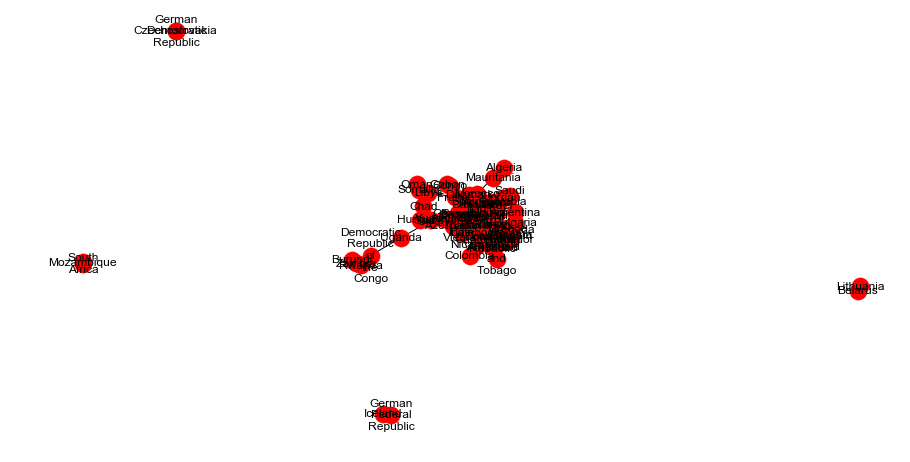

In [124]:
filterwarnings('ignore')

plt.style.use('seaborn')
plt.figure(figsize = (12, 6))

positions = nx.spring_layout(country_graph)
network = nx.draw(country_graph, pos = positions)
labels = nx.draw_networkx_labels(country_graph, pos = positions)
nx.write_gexf(country_graph, "test.gexf")

In [125]:
nx.number_of_nodes(country_graph)

68

In [72]:
print(np.asarray(nx.degree(country_graph)))

[['Argentina' '1']
 ['Haiti' '3']
 ['Azerbaijan' '1']
 ['Russia' '14']
 ['Canada' '6']
 ['Denmark' '1']
 ['France' '7']
 ['Portugal' '2']
 ['Spain' '3']
 ['China' '1']
 ['Congo' '1']
 ['Finland' '1']
 ['Gabon' '1']
 ['Libya' '1']
 ['Morocco' '1']
 ['Georgia' '1']
 ['Germany' '1']
 ['United\nStates\nof\nAmerica' '2']
 ['Iran' '1']
 ['United\nKingdom' '3']
 ['Republic\nof\nVietnam' '1']
 ['Thailand' '1']
 ['Turkey' '1']
 ['Yugoslavia' '1']]


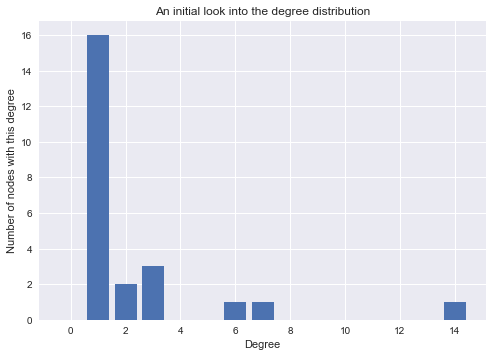

In [73]:
# Degree histogram of the network
degree_hist = nx.degree_histogram(country_graph)
xticks = range(len(degree_hist))
plt.bar(xticks, degree_hist, align='center')
plt.xlabel('Degree')
plt.ylabel('Number of nodes with this degree')
plt.title('An initial look into the degree distribution');

In [74]:
# Network density
nx.density(country_graph)

0.10144927536231885

In [75]:
# There is a single component in this graph (in others, there can be many components)
for i, component in enumerate(nx.connected_components(country_graph)):
    print("COMPONENT {:d}:".format(i), component)

COMPONENT 0: {'Turkey', 'Russia', 'Canada', 'Spain', 'France', 'Argentina', 'Azerbaijan', 'Haiti', 'Morocco', 'Portugal', 'Finland', 'United\nKingdom', 'Libya', 'Thailand', 'Republic\nof\nVietnam', 'Germany', 'Georgia', 'Gabon', 'Congo', 'United\nStates\nof\nAmerica', 'China', 'Denmark', 'Yugoslavia', 'Iran'}


In [76]:
# What are the degrees of France's neighbors? 
for neighbor in nx.all_neighbors(country_graph, 'United\nKingdom'):
    print(neighbor)
    degree = nx.degree(country_graph, neighbor)
    print('- degree: {:d}'.format(degree))
    print('------------')

Portugal
- degree: 2
------------
Russia
- degree: 14
------------
Spain
- degree: 3
------------


In [77]:
# Let's focus on other centrality values of these nodes

# Closeness: Inverse of the average length of all shortest paths from this node to all other nodes
# (closer to 1 = more central)
nx.closeness_centrality(country_graph)

{'Argentina': 0.2875,
 'Haiti': 0.39655172413793105,
 'Azerbaijan': 0.41818181818181815,
 'Russia': 0.696969696969697,
 'Canada': 0.575,
 'Denmark': 0.3709677419354839,
 'France': 0.575,
 'Portugal': 0.38333333333333336,
 'Spain': 0.41818181818181815,
 'China': 0.41818181818181815,
 'Congo': 0.3709677419354839,
 'Finland': 0.41818181818181815,
 'Gabon': 0.3709677419354839,
 'Libya': 0.3709677419354839,
 'Morocco': 0.3709677419354839,
 'Georgia': 0.41818181818181815,
 'Germany': 0.41818181818181815,
 'United\nStates\nof\nAmerica': 0.45098039215686275,
 'Iran': 0.41818181818181815,
 'United\nKingdom': 0.45098039215686275,
 'Republic\nof\nVietnam': 0.41818181818181815,
 'Thailand': 0.41818181818181815,
 'Turkey': 0.41818181818181815,
 'Yugoslavia': 0.41818181818181815}

In [78]:
# Betweenness: Consider the shortest paths between each pair of nodes.
# What fraction of all these paths are going through this node?
nx.betweenness_centrality(country_graph)

{'Argentina': 0.0,
 'Haiti': 0.09321475625823451,
 'Azerbaijan': 0.0,
 'Russia': 0.7414361001317523,
 'Canada': 0.25428194993412373,
 'Denmark': 0.0,
 'France': 0.33959156785243755,
 'Portugal': 0.004611330698287219,
 'Spain': 0.014492753623188406,
 'China': 0.0,
 'Congo': 0.0,
 'Finland': 0.0,
 'Gabon': 0.0,
 'Libya': 0.0,
 'Morocco': 0.0,
 'Georgia': 0.0,
 'Germany': 0.0,
 'United\nStates\nof\nAmerica': 0.04545454545454545,
 'Iran': 0.0,
 'United\nKingdom': 0.04051383399209485,
 'Republic\nof\nVietnam': 0.0,
 'Thailand': 0.0,
 'Turkey': 0.0,
 'Yugoslavia': 0.0}

In [79]:
# Eigencentrality: like Google's PageRank: a measure of information flow
nx.eigenvector_centrality(country_graph)

{'Argentina': 0.0312418434739212,
 'Haiti': 0.13240703629424652,
 'Azerbaijan': 0.13937486974803728,
 'Russia': 0.5906933860069514,
 'Canada': 0.3592981142935951,
 'Denmark': 0.08477786781359711,
 'France': 0.3556336602038548,
 'Portugal': 0.13766435834119092,
 'Spain': 0.22157764780624736,
 'China': 0.13937486974803728,
 'Congo': 0.08391328946505666,
 'Finland': 0.13937486974803728,
 'Gabon': 0.08391328946505666,
 'Libya': 0.08391328946505666,
 'Morocco': 0.08391328946505666,
 'Georgia': 0.13937486974803728,
 'Germany': 0.13937486974803728,
 'United\nStates\nof\nAmerica': 0.1706167132219583,
 'Iran': 0.13937486974803728,
 'United\nKingdom': 0.22413930811910157,
 'Republic\nof\nVietnam': 0.13937486974803728,
 'Thailand': 0.13937486974803728,
 'Turkey': 0.13937486974803728,
 'Yugoslavia': 0.13937486974803728}

In [82]:
# (in case there are multiple paths of this same shortest length between these two)
# for i, path in enumerate(nx.all_shortest_paths(country_graph, 'Jordan', 'Ecuador')):
#     print("Shortest Path {}:".format(i), path)

In [83]:
nx.average_shortest_path_length(country_graph)

2.4057971014492754

In [84]:
# Find the Communities with python-louvain
modules = community.best_partition(country_graph)
modules

{'Argentina': 0,
 'Haiti': 0,
 'Azerbaijan': 1,
 'Russia': 1,
 'Canada': 2,
 'Denmark': 2,
 'France': 3,
 'Portugal': 2,
 'Spain': 2,
 'China': 1,
 'Congo': 3,
 'Finland': 1,
 'Gabon': 3,
 'Libya': 3,
 'Morocco': 3,
 'Georgia': 1,
 'Germany': 1,
 'United\nStates\nof\nAmerica': 1,
 'Iran': 1,
 'United\nKingdom': 2,
 'Republic\nof\nVietnam': 1,
 'Thailand': 1,
 'Turkey': 1,
 'Yugoslavia': 1}

In [85]:
# How many modules do we have?
module_ids = set(modules.values())
num_modules = len(module_ids)
num_modules

4

In [86]:
# It would be nice to look up a module and
# see which nodes its members are
from collections import defaultdict
module_to_nodes = defaultdict(list)
for node, module_id in modules.items():
    module_to_nodes[module_id].append(node)

module_to_nodes

defaultdict(list,
            {0: ['Argentina', 'Haiti'],
             1: ['Azerbaijan',
              'Russia',
              'China',
              'Finland',
              'Georgia',
              'Germany',
              'United\nStates\nof\nAmerica',
              'Iran',
              'Republic\nof\nVietnam',
              'Thailand',
              'Turkey',
              'Yugoslavia'],
             2: ['Canada', 'Denmark', 'Portugal', 'Spain', 'United\nKingdom'],
             3: ['France', 'Congo', 'Gabon', 'Libya', 'Morocco']})

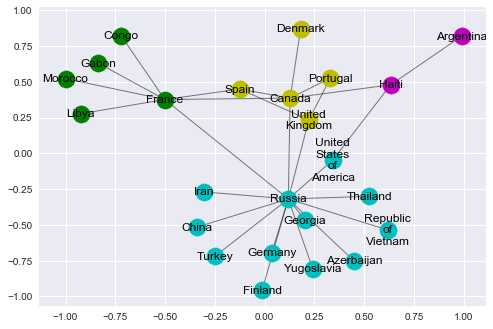

In [87]:
# Let's visualize the modules

# Use the same layout as before
positions = nx.spring_layout(country_graph)

# But now, instead of drawing it all at once, draw
# nodes module by module, using a different color
# for each module
colors = ['m', 'c', 'y', 'g', 'r', 'b']
for i, module in enumerate(module_ids):
    nodes_in_this_module = module_to_nodes[module]
    module_color = colors[i % len(colors)]
    nx.draw_networkx_nodes(country_graph,
                           positions,
                           nodes_in_this_module,
                           node_color = module_color)
    
# draw the edges and labels as well and voila
nx.draw_networkx_edges(country_graph, positions, alpha=0.5)
labels = nx.draw_networkx_labels(country_graph, pos = positions)

In [88]:
nx.write_gexf(country_graph, "test.gexf")